In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
data_dir = 'cell_images'
num_classes = 2

In [24]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)

data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 27558 images belonging to 2 classes.


In [30]:
history = model.fit(
    data_generator,
    steps_per_epoch=100,
    epochs=10
)

Epoch 1/10


2023-06-01 21:40:15.957469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 21s 206ms/step - loss: 0.6933 - accuracy: 0.4859
Epoch 2/10
100/100 [==============================] - 20s 198ms/step - loss: 0.6932 - accuracy: 0.4891
Epoch 3/10
100/100 [==============================] - 20s 198ms/step - loss: 0.6931 - accuracy: 0.5019
Epoch 4/10
100/100 [==============================] - 20s 199ms/step - loss: 0.6934 - accuracy: 0.4800
Epoch 5/10
100/100 [==============================] - 20s 198ms/step - loss: 0.6932 - accuracy: 0.4925
Epoch 6/10
100/100 [==============================] - 20s 197ms/step - loss: 0.6932 - accuracy: 0.4972
Epoch 7/10
100/100 [==============================] - 20s 201ms/step - loss: 0.6932 - accuracy: 0.4884
Epoch 8/10
100/100 [==============================] - 20s 198ms/step - loss: 0.6931 - accuracy: 0.4959
Epoch 9/10
100/100 [==============================] - 20s 200ms/step - loss: 0.6933 - accuracy: 0.4959
Epoch 10/10
100/100 [==============================] - 20s 198ms/step - loss: 0.6928

In [31]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy
0,0.693311,0.485938
1,0.693226,0.489062
2,0.693064,0.501875
3,0.693369,0.480000
4,0.693175,0.492500


In [32]:
model.save("malaria.h5")

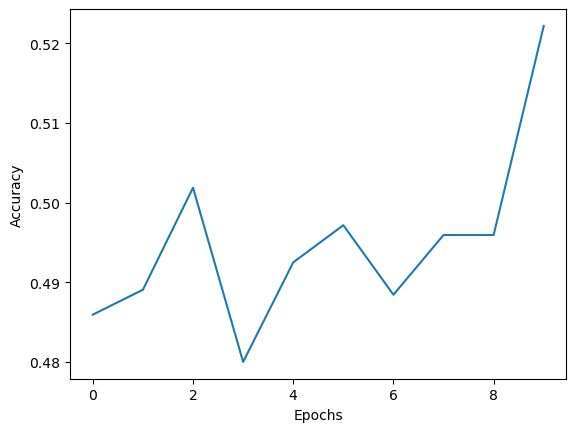

In [34]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

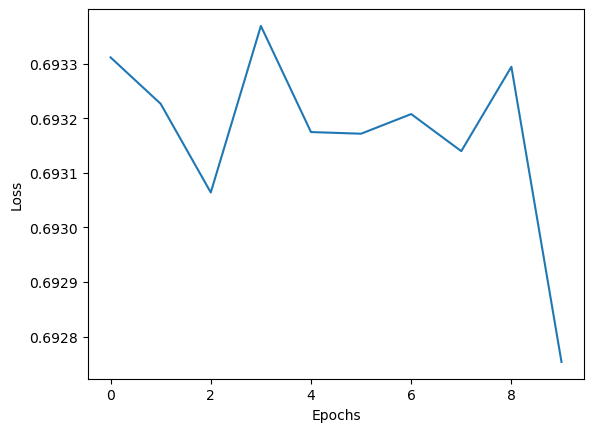

In [35]:
plt.figure()
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [36]:
test_loss, test_acc = model.evaluate(data_generator)
print('Test accuracy:', test_acc)

2023-06-01 21:45:35.206179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


862/862 [==============================] - 133s 154ms/step - loss: 0.6934 - accuracy: 0.5000
Test accuracy: 0.5
